## What is the most optimal skill to learn for Data Analysts?
**Methodology**

1.Continue from last notebook to find percent of postings with skill

2.Visualize median salary vs percent skill demand

3.(Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')].copy()


In [3]:
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded=df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [15]:
df_DA_skills=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills=df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})

DA_job_count=len(df_DA_US)
# df_DA_skills
df_DA_skills['skill_percent']=df_DA_skills['skill_count']/DA_job_count *100

skill_percent=5

df_DA_skills_high_demand=df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


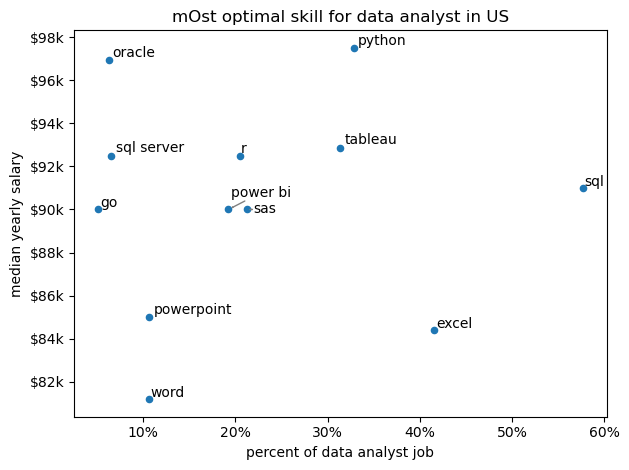

In [21]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
  # print(i, txt)
   texts.append( plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->',color='gray',lw=1))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}k'))

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter())

plt.xlabel('percent of data analyst job')
plt.ylabel('median yearly salary')
plt.title('mOst optimal skill for data analyst in US')

plt.tight_layout()

plt.show()    


In [22]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [23]:
df_technology=df['job_type_skills'].copy()

df_technology=df_technology.drop_duplicates()

df_technology=df_technology.dropna()

df_technology

1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5         {'cloud': ['gcp'], 'programming': ['python', '...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177562, dtype: object

In [24]:

technology_dict={}

for row in df_technology:
  row_dic=ast.literal_eval(row)  # convert string to dictionary
  for key,value in row_dic.items():
    if key in technology_dict: # if key already exist int technology_dict,add value to existing 
      technology_dict[key] +=value
    else:
      technology_dict[key] =value  

for key, value in technology_dict.items():
  technology_dict[key]=list(set(value))

technology_dict        

{'analyst_tools': ['splunk',
  'msaccess',
  'visio',
  'powerpoint',
  'datarobot',
  'esquisse',
  'alteryx',
  'spreadsheet',
  'power bi',
  'powerbi',
  'cognos',
  'tableau',
  'excel',
  'spss',
  'nuix',
  'looker',
  'ms access',
  'ssis',
  'qlik',
  'sas',
  'microstrategy',
  'ssrs',
  'sharepoint',
  'dax',
  'sheets',
  'word',
  'sap',
  'outlook'],
 'programming': ['ocaml',
  'sql',
  'vb.net',
  'c++',
  'rust',
  'dart',
  'objective-c',
  'c#',
  'swift',
  'go',
  'no-sql',
  'typescript',
  'groovy',
  'solidity',
  'nosql',
  'bash',
  'lua',
  'php',
  'mongo',
  'scala',
  'fortran',
  'ruby',
  'delphi',
  'java',
  'javascript',
  'lisp',
  'clojure',
  't-sql',
  'matlab',
  'golang',
  'f#',
  'r',
  'vba',
  'sas',
  'cobol',
  'visual basic',
  'html',
  'python',
  'css',
  'assembly',
  'perl',
  'julia',
  'powershell',
  'c',
  'visualbasic',
  'sass',
  'erlang',
  'mongodb',
  'pascal',
  'elixir',
  'haskell',
  'shell',
  'crystal',
  'kotlin',
  '

In [26]:
df_technology=pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology=df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,splunk
0,analyst_tools,msaccess
0,analyst_tools,visio
0,analyst_tools,powerpoint
0,analyst_tools,datarobot
...,...,...
9,sync,google chat
9,sync,wire
9,sync,symphony
9,sync,mattermost


In [27]:
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [31]:
df_plot=df_DA_skills_high_demand.merge(df_technology,left_on='job_skills', right_on="skills")  

#  left_on='job_skills'
# → This tells Pandas to use the column named 'job_skills' in the left DataFrame (df_DA_skills_high_demand) for matching.

# right_on='skills'
# → This tells Pandas to use the column named 'skills' in the right DataFrame (df_technology) for matching.

df_plot


,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


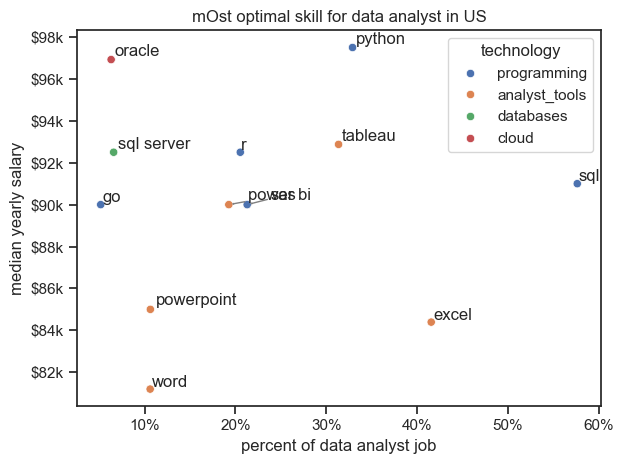

In [52]:
from adjustText import adjust_text

# df_plot.plot(kind='scatter',x='skill_percent',y='median_salary')

sns.scatterplot(
   data=df_plot,
   x='skill_percent',
   y='median_salary',
   hue='technology',
   
)
# sns.despine()
# sns.set_theme(style='ticks')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
  # print(i, txt)
   texts.append( plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->',color='gray',lw=1))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}k'))

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter())

plt.xlabel('percent of data analyst job')
plt.ylabel('median yearly salary')
plt.title('mOst optimal skill for data analyst in US')

plt.tight_layout()

plt.show()    
